In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/data01/Tomo2Mesh/scratchpad/polymer_am_eaton/code')
from tomo2mesh.projects.eaton.rw_utils_ae import read_raw_data_any
from tomo2mesh.projects.eaton.recon import recon_slice, recon_binned
from tomo2mesh.misc import viewer
from tomo2mesh.misc.voxel_processing import cylindrical_mask, modified_autocontrast
import glob

['/data01/Eaton_Polymer_AM/raw_data_other/TCRP3_AMTitan_200umlht_146.h5',
 '/data01/Eaton_Polymer_AM/raw_data_other/TCRP3_AMTitan_200umlht_147.h5',
 '/data01/Eaton_Polymer_AM/raw_data_other/TCRP3_AMTitan_200umlht_148.h5',
 '/data01/Eaton_Polymer_AM/raw_data_other/TCRP3_AMTitan_200umlht_149.h5',
 '/data01/Eaton_Polymer_AM/raw_data_other/TCRP3_AMTitan_400umlht_150.h5',
 '/data01/Eaton_Polymer_AM/raw_data_other/TCRP3_AMTitan_400umlht_151.h5',
 '/data01/Eaton_Polymer_AM/raw_data_other/TCRP3_AMcosine_400umlht_141.h5',
 '/data01/Eaton_Polymer_AM/raw_data_other/TCRP3_AMcosine_400umlht_142.h5',
 '/data01/Eaton_Polymer_AM/raw_data_other/TCRP3_AMcosine_400umlht_143.h5',
 '/data01/Eaton_Polymer_AM/raw_data_other/TCRP3_AMcosine_400umlht_144.h5',
 '/data01/Eaton_Polymer_AM/raw_data_other/TCRP3_AMcosine_400umlht_145.h5',
 '/data01/Eaton_Polymer_AM/raw_data_other/TCRP3_injmold_140.h5']

In [2]:
flist = glob.glob('/data01/Eaton_Polymer_AM/raw_data_other/TCRP3_AMTitan_200umlht*')
for f in flist: print(f)

/data01/Eaton_Polymer_AM/raw_data_other/TCRP3_AMTitan_200umlht_147.h5
/data01/Eaton_Polymer_AM/raw_data_other/TCRP3_AMTitan_200umlht_146.h5
/data01/Eaton_Polymer_AM/raw_data_other/TCRP3_AMTitan_200umlht_149.h5
/data01/Eaton_Polymer_AM/raw_data_other/TCRP3_AMTitan_200umlht_148.h5


In [8]:
from tomo2mesh.misc.find_center import read_opposing_pairs, estimate_center
search_width = 5
center_guess = 1163
roi_height = (0.1, 0.9)
roi_width = 0.8
fpath = flist[0]
print(fpath)

/data01/Eaton_Polymer_AM/raw_data_other/TCRP3_AMTitan_200umlht_147.h5


In [10]:
# pair = read_opposing_pairs(fpath)
# search_range = (center_guess - search_width, center_guess + search_width)
# center = estimate_center(pair, search_range, roi_width = roi_width, metric = "MSE", roi_height = roi_height)
# print(center)

In [5]:
projs, theta, center, dark, flat = read_raw_data_any(fpath)

In [6]:
V = recon_binned(projs, theta, 1163, dark, flat, 4, 3.13).get()
h = modified_autocontrast(V)
V = np.clip(V, *h)
cylindrical_mask(V, 1.0, mask_val = V.min())

/data01/Tomo2Mesh/tomo2mesh/projects/eaton/recon.py:178: FutureWarning: cupy.fft.cache.clear_plan_cache is experimental. The interface can change in the future.
  cp.fft.config.clear_plan_cache()


In [7]:
imgs = viewer.get_orthoplanes(vol = V)

<AxesSubplot:>

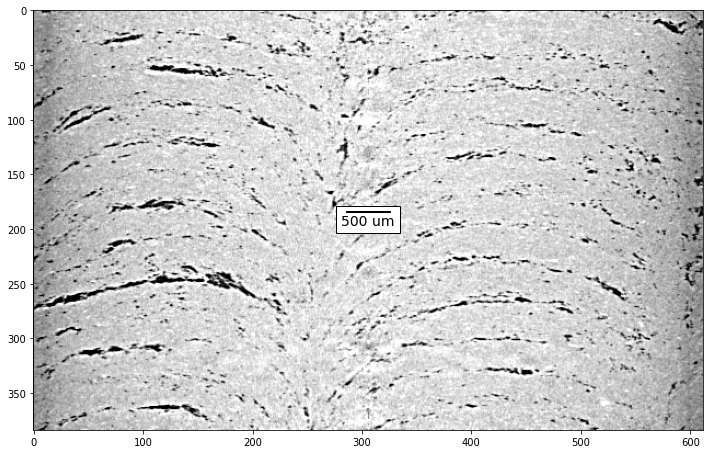

In [8]:
fig, ax = plt.subplots(1,1, figsize = (12,12))
ax.imshow(imgs[1], cmap = 'gray')
viewer.add_scalebar(ax, 500, 3.13*4, fontsize = 14, loc = 'center')
# ax.axis('off')

(-0.5, 611.5, 611.5, -0.5)

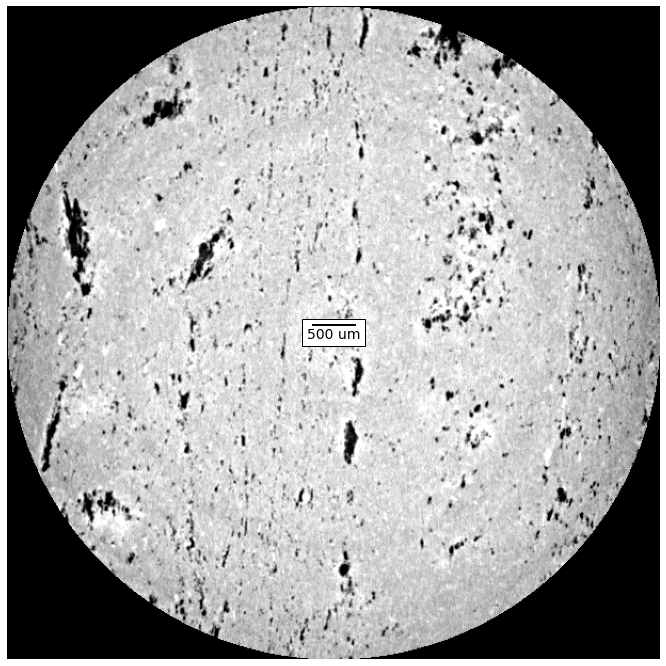

In [9]:
fig, ax = plt.subplots(1,1, figsize = (12,12))
ax.imshow(imgs[0], cmap = 'gray')
viewer.add_scalebar(ax, 500, 3.13*4, fontsize = 14, loc = 'center')
ax.axis('off')

<AxesSubplot:>

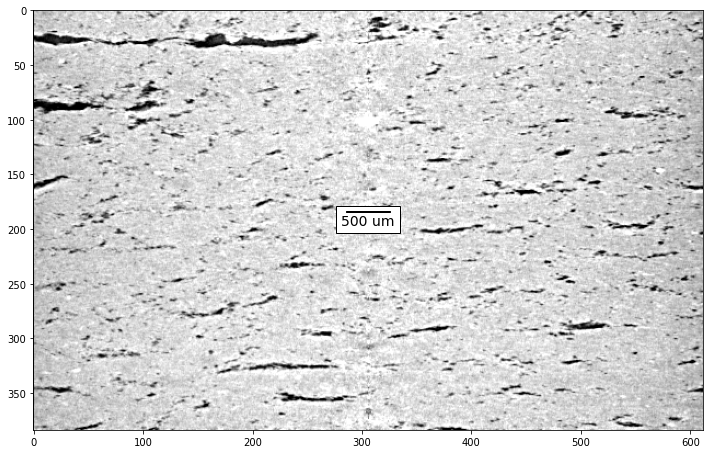

In [10]:
fig, ax = plt.subplots(1,1, figsize = (12,12))
ax.imshow(imgs[2], cmap = 'gray')
viewer.add_scalebar(ax, 500, 3.13*4, fontsize = 14, loc = 'center')
# ax.axis('off')

Text(0, 0.5, 'mean intensity per slice')

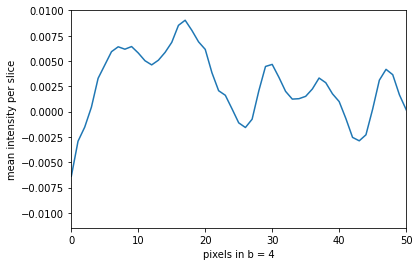

In [11]:
z_var = np.mean(V, axis = (1,2))
plt.plot(z_var)
plt.xlim([0,50])
plt.xlabel('pixels in b = 4')
plt.ylabel('mean intensity per slice')